Customer Segmentation

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=f678a5b9ac330c7099a577f2e7596c0501276ad1604b14969ce387c3d6e0842e
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [83]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()
# This session is the entry point for interacting with Spark functionalities.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# My data is in google drive.
data="/content/drive/MyDrive/ML_Dataset/data.csv"

In [85]:
df = spark.read.csv(data, header=True, inferSchema=True)
df.count()

541909

In [86]:
df.printSchema()


root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [87]:
from pyspark.sql.functions import regexp_replace
df = df.withColumn("InvoiceDate", regexp_replace("InvoiceDate", "-", "/"))
df.show()


+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/01/2010 08:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/0

In [88]:
#need to convert date which is in string to date
from pyspark.sql.functions import to_timestamp
# Creating a timestamp column to include both date and time
df = df.withColumn("Timestamp", to_timestamp(df["InvoiceDate"], "MM/dd/yyyy HH:mm"))
from pyspark.sql.functions import to_date

# Assuming your DataFrame is named df and has a column named 'Timestamp'
df = df.withColumn("Date", to_date(df["Timestamp"]))


In [89]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- Date: date (nullable = true)



In [90]:
df.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+----------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-------------------+----------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    71053| WHITE METAL LANTERN|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029E|RED WOOLLY HOTTIE...|      

In [91]:
#drop description
df = df.drop('Description')
df.show()

+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029E|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    22752|       2|12/01/2010 08:26|     7.65|     17850|United Kingd

In [92]:

spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [93]:
#checking NA values :
df.filter(df.Date.isNull()).count()
# df.toPandas(): Converts the PySpark DataFrame (df) to a Pandas DataFrame.

0

In [94]:
#Removing Negative values from Quantity :
df = df.filter(df.Quantity > 0)
df.show()


+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029E|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    22752|       2|12/01/2010 08:26|     7.65|     17850|United Kingd

In [95]:
#Removing NA values
df = df.dropna()
# used to remove rows containing missing values (nulls) from a DataFrame.
# Creates new DataFrame containing rows without missing values based on specified conditions.
df.show()
df.count()

+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|   84029E|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|
|   536365|    22752|       2|12/01/2010 08:26|     7.65|     17850|United Kingd

397924

In [96]:
#Number Of countries :
df.select('Country').distinct().count()

37

In [97]:
# sort by count
country_counts=df.groupBy('Country').count().orderBy('count', ascending=False).show()


+---------------+------+
|        Country| count|
+---------------+------+
| United Kingdom|354345|
|        Germany|  9042|
|         France|  8342|
|           EIRE|  7238|
|          Spain|  2485|
|    Netherlands|  2363|
|        Belgium|  2031|
|    Switzerland|  1842|
|       Portugal|  1462|
|      Australia|  1185|
|         Norway|  1072|
|          Italy|   758|
|Channel Islands|   748|
|        Finland|   685|
|         Cyprus|   614|
|         Sweden|   451|
|        Austria|   398|
|        Denmark|   380|
|         Poland|   330|
|          Japan|   321|
+---------------+------+
only showing top 20 rows



+---------------+------+
|        Country| count|
+---------------+------+
| United Kingdom|354345|
|        Germany|  9042|
|         France|  8342|
|           EIRE|  7238|
|          Spain|  2485|
|    Netherlands|  2363|
|        Belgium|  2031|
|    Switzerland|  1842|
|       Portugal|  1462|
|      Australia|  1185|
|         Norway|  1072|
|          Italy|   758|
|Channel Islands|   748|
|        Finland|   685|
|         Cyprus|   614|
|         Sweden|   451|
|        Austria|   398|
|        Denmark|   380|
|         Poland|   330|
|          Japan|   321|
+---------------+------+
only showing top 20 rows



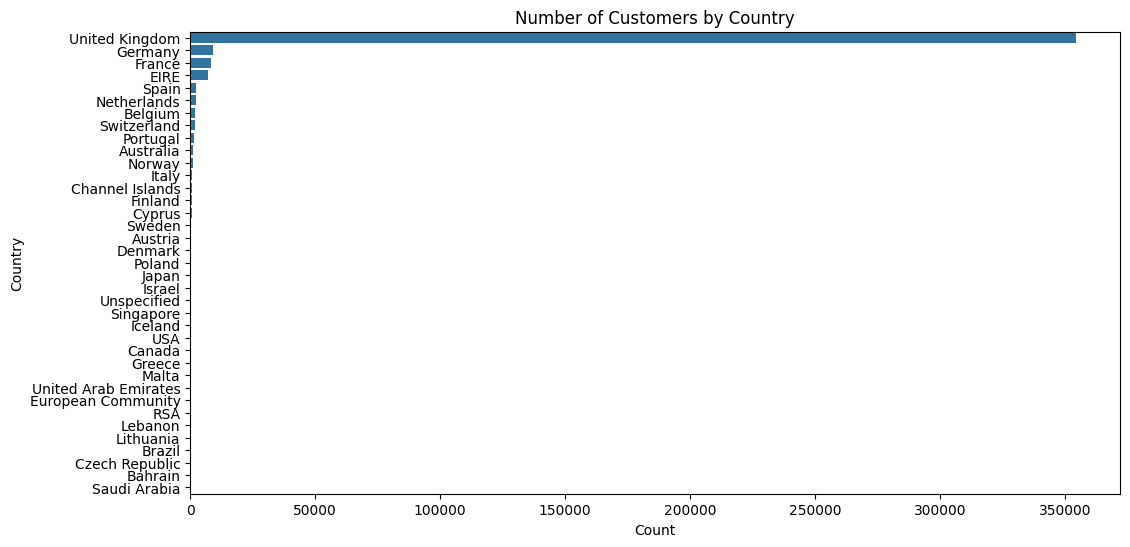

In [98]:
# sort by count
country_counts=df.groupBy('Country').count().orderBy('count', ascending=False)
country_counts.show() # Display the results

# Now convert to Pandas DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
country_counts_pd = country_counts.toPandas()

# plot histogram
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='Country', data=country_counts_pd)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Customers by Country')
plt.show()

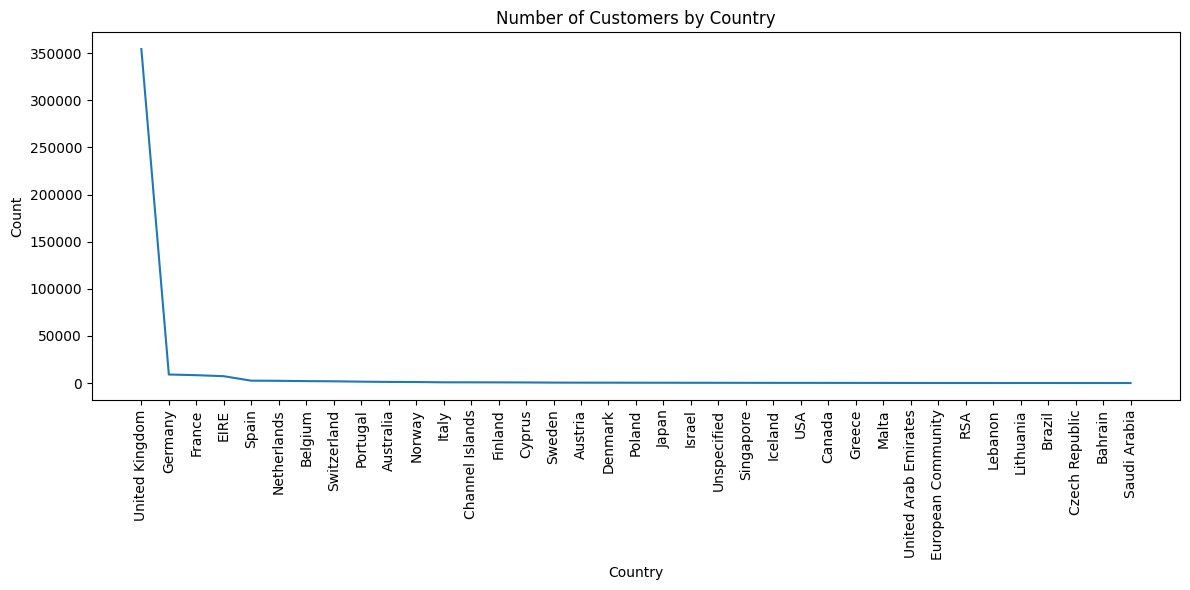

In [99]:
# plot line plot
plt.figure(figsize=(12,6))
plt.plot(country_counts_pd['Country'], country_counts_pd['count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Customers by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The goods are shipped to 37 unique countries. The majority of goods is shipped to the United Kingdom. After the United Kingdom, Germany, France and EIRE (=Ireland) are the most important countries.

In [100]:
# Feature Engineering :
#calculate TotalPrice
# from pyspark.sql.functions import *
from pyspark.sql.functions import round
df = df.withColumn("TotalPrice", round(df.Quantity * df.UnitPrice, 2))
df.show()


+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|TotalPrice|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      15.3|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      22.0|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|
|   536365|   84029E|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|    

In [101]:
from pyspark.sql.functions import dayofmonth, month, year
df = df.withColumn("Day", dayofmonth(df.Date)) \
       .withColumn("Month", month(df.Date)) \
       .withColumn("Year", year(df.Date))

In [102]:
df.show()

+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      15.3|  1|   12|2010|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|  1|   12|2010|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      22.0|  1|   12|2010|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|  1|   12|2010|
|   536365|  

In [103]:
#number of transactions per month of year  2011
df.filter(df.Year == 2011).groupBy('Year', 'Month').count().orderBy('Month').show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2011|    1|21232|
|2011|    2|19928|
|2011|    3|27177|
|2011|    4|22644|
|2011|    5|28322|
|2011|    6|27185|
|2011|    7|26827|
|2011|    8|27013|
|2011|    9|40030|
|2011|   10|49557|
|2011|   11|64545|
|2011|   12|17304|
+----+-----+-----+



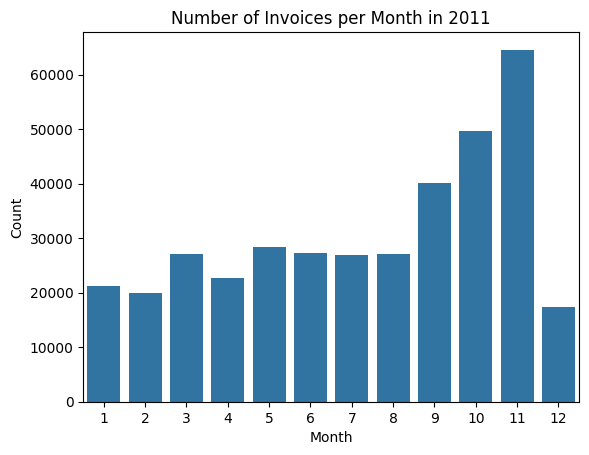

In [104]:
#plot graph for count the number of transaction per month for 2011
#plot the number of invoices per month
day_counts = df.filter(df.Year == 2011).groupBy('Month').count().orderBy('Month').toPandas() # Convert to Pandas DataFrame
#plot histogram
#plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='count', data=day_counts) # Pass the DataFrame to the 'data' parameter
plt.xlabel('Month') # Correct x-axis label
plt.ylabel('Count') # Correct y-axis label
plt.title('Number of Invoices per Month in 2011') # Correct title
plt.show()

In [105]:
# Check the distinct days in Nov 2011
df.filter((df.Year == 2011) & (df.Month==11)).select('Day').distinct().orderBy('Day').show()

+---+
|Day|
+---+
|  1|
|  2|
|  3|
|  4|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 20|
| 21|
| 22|
| 23|
+---+
only showing top 20 rows



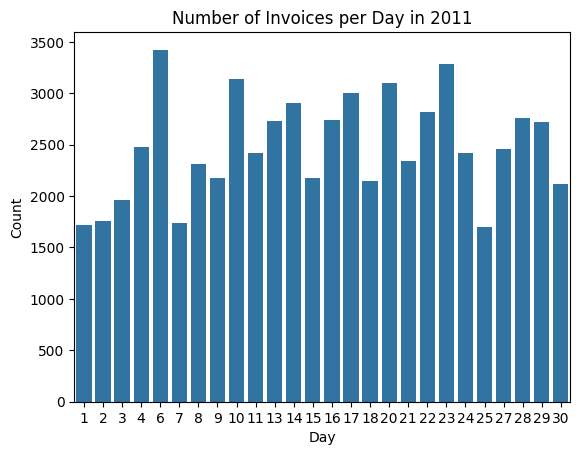

In [106]:
#plot the number of invoices per day
day_counts = df.filter((df.Year == 2011) & (df.Month==11)).groupBy('Day').count().orderBy('Day').toPandas() # Convert to Pandas DataFrame
#plot histogram
# plt.figure(figsize=(12,6))
sns.barplot(x='Day', y='count', data=day_counts) # Pass the DataFrame to the 'data' parameter
plt.xlabel('Day') # Correct x-axis label
plt.ylabel('Count') # Correct y-axis label
plt.title('Number of Invoices per Day in 2011') # Correct title
plt.show()

In [107]:
#seprate date into day format as monday tuesday and so on
from pyspark.sql.functions import date_format
df = df.withColumn("DayName", date_format(df.Date, "EEEE"))
df.show()

+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+---------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|  DayName|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+---------+
|   536365|   85123A|       6|12/01/2010 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      15.3|  1|   12|2010|Wednesday|
|   536365|    71053|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|  1|   12|2010|Wednesday|
|   536365|   84406B|       8|12/01/2010 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01|      22.0|  1|   12|2010|Wednesday|
|   536365|   84029G|       6|12/01/2010 08:26|     3.39|     17850|United Kingdom|2010-12-01 

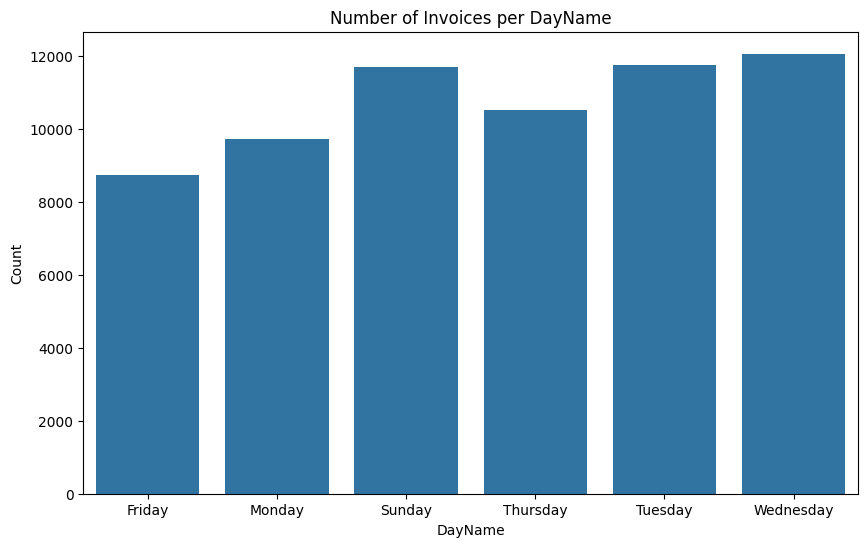

In [108]:
#plot the number of invoices per DayName
day_counts = df.filter((df.Year == 2011) & (df.Month==11)).groupBy('DayName').count().orderBy('DayName').toPandas() # Convert to Pandas DataFrame
#plot histogram
plt.figure(figsize=(10,6))
sns.barplot(x='DayName', y='count', data=day_counts)
plt.xlabel('DayName')
plt.ylabel('Count')
plt.title('Number of Invoices per DayName')
plt.show()


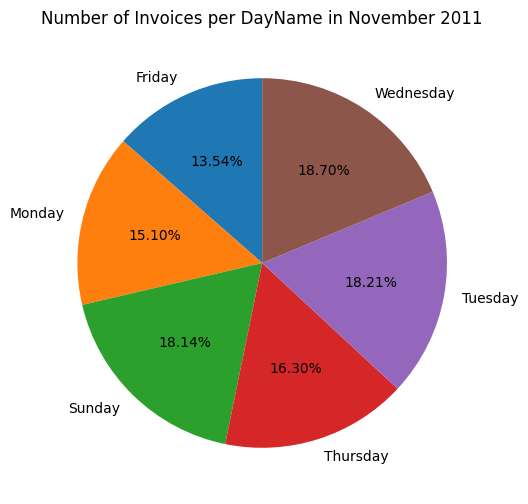

In [109]:
day_counts = df.filter((df.Year == 2011) & (df.Month==11)).groupBy('DayName').count().orderBy('DayName').toPandas()
plt.figure(figsize=(12,6))
plt.pie(day_counts['count'], labels=day_counts['DayName'], autopct='%1.2f%%', startangle=90)
plt.title('Number of Invoices per DayName in November 2011')
plt.show()

In [110]:

# RFM :

# RECENCY - how recent did a customer bought something
# FREQUENCY - how often does a customer buy something
# MONETARY VALUE - what is the value of the purchased items



In [111]:
#last date or latest date available in our dataset with format
from pyspark.sql.functions import max, date_format

# Get the latest date and format it
latest_date_formatted = df.agg(date_format(max("Date"), "MM-dd-yyyy").alias("LatestDate")).collect()[0][0]

print(latest_date_formatted)


12-09-2011


In [112]:
#get latest date of customer having same id
from pyspark.sql.functions import max
from pyspark.sql.window import Window
df_r = df.withColumn("LatestDate", date_format(max("Date").over(Window.partitionBy("CustomerID")), "MM-dd-yyyy"))
df_r.show()

+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+-------+----------+
|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayName|LatestDate|
+---------+---------+--------+----------------+---------+----------+--------------+-------------------+----------+----------+---+-----+----+-------+----------+
|   541431|    23166|   74215| 1/18/2011 10:01|     1.04|     12346|United Kingdom|2011-01-18 10:01:00|2011-01-18|   77183.6| 18|    1|2011|Tuesday|01-18-2011|
|   537626|    85116|      12|12/07/2010 14:57|      2.1|     12347|       Iceland|2010-12-07 14:57:00|2010-12-07|      25.2|  7|   12|2010|Tuesday|12-07-2011|
|   537626|    22375|       4|12/07/2010 14:57|     4.25|     12347|       Iceland|2010-12-07 14:57:00|2010-12-07|      17.0|  7|   12|2010|Tuesday|12-07-2011|
|   537626|    71477|      12|12/07/2010

In [113]:
# #delete customerid having same duplicated except latest date of that cutomerid
# from pyspark.sql.window import Window
# from pyspark.sql.functions import row_number
# window_spec = Window.partitionBy("CustomerID").orderBy(df["Date"].desc())
# df = df.withColumn("row_num", row_number().over(window_spec))
# df = df.filter(df["row_num"] == 1).drop("row_num")
# df.show()


In [121]:
from pyspark.sql.functions import datediff, lit, to_date

# Ensure both dates are in a consistent format
df = df.withColumn("Date", to_date(df.Date, "MM-dd-yyyy"))
df = df.withColumn("Recency", datediff(to_date(lit("12-09-2011"), "MM-dd-yyyy"), df.Date))
df.show()

#12-09-2011-2010-12-01=365+(9-1)=365+8=  373

+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+---------+---------+---------+-------+
|CustomerID|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|  DayName|Frequency|Frequency|Recency|
+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+---------+---------+---------+-------+
|     17420|   536385|    22783|       1|12/01/2010 09:56|    19.95|United Kingdom|2010-12-01 09:56:00|2010-12-01|     19.95|  1|   12|2010|Wednesday|       30|       30|    373|
|     17420|   536385|    22961|      12|12/01/2010 09:56|     1.45|United Kingdom|2010-12-01 09:56:00|2010-12-01|      17.4|  1|   12|2010|Wednesday|       30|       30|    373|
|     17420|   536385|    22960|       6|12/01/2010 09:56|     4.25|United Kingdom|2010-12-01 09:56:00|20

Recency
Recency was calculated as one of the features for the segmentation analysis. In this case recency has been calculated as follows, time of customer’s last purchase minus Latest date


In [124]:
#calculate frequency of purchase(number of purchases made by each customer.)
from pyspark.sql.functions import count
df.groupBy('CustomerID').agg(count('*').alias('Frequency')).orderBy('Frequency', ascending=False).show()
#show frequency in df as column
df_frequency = df.groupBy('CustomerID').agg(count('*').alias('Frequency')) # Calculate frequency and store in a separate DataFrame
df = df.join(df_frequency, 'CustomerID') # Join the original DataFrame with the frequency DataFrame
df.show()

+----------+---------+
|CustomerID|Frequency|
+----------+---------+
|     17841|     7847|
|     14911|     5677|
|     14096|     5111|
|     12748|     4596|
|     14606|     2700|
|     15311|     2379|
|     14646|     2080|
|     13089|     1818|
|     13263|     1677|
|     14298|     1637|
|     15039|     1502|
|     14156|     1400|
|     18118|     1279|
|     14159|     1204|
|     14796|     1141|
|     16033|     1137|
|     15005|     1119|
|     14056|     1106|
|     14769|     1090|
|     13081|     1028|
+----------+---------+
only showing top 20 rows

+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+--------------+---------+
|CustomerID|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayName|Recency|MonetaryValues|Frequency|
+----------+---------+---------+--------+----------------+

In [129]:
from pyspark.sql.functions import sum, col
df = df.withColumn("TotalPrice", col("TotalPrice").cast("float"))
# Monetary Value of Customers
df.groupBy('CustomerID').agg(round(sum('TotalPrice'),2).alias('MonetaryValue')).orderBy('MonetaryValue',ascending=False).show()
#show Monetary in df as column
df_monetary = df.groupBy('CustomerID').agg(round(sum('TotalPrice'),2).alias('MonetaryValues')) # Calculate Monetary and store in a separate DataFrame
df = df.join(df_monetary, 'CustomerID') # Join the original DataFrame with the Monetary DataFrame
df.show()

+----------+-------------+
|CustomerID|MonetaryValue|
+----------+-------------+
|     14646|    280206.02|
|     18102|     259657.3|
|     17450|    194550.79|
|     16446|    168472.49|
|     14911|    143825.06|
|     12415|    124914.53|
|     14156|    117379.63|
|     17511|     91062.38|
|     16029|     81024.84|
|     12346|      77183.6|
|     16684|     66653.56|
|     14096|     65164.79|
|     13694|     65039.62|
|     15311|      60767.9|
|     13089|     58825.83|
|     17949|     58510.48|
|     15769|     56252.72|
|     15061|     54534.14|
|     14298|      51527.3|
|     14088|     50491.81|
+----------+-------------+
only showing top 20 rows

+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+
|CustomerID|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayN

In [128]:
# # #drop monetary value column
# df = df.drop('MonetaryValues')
# # # df.show()
# # #drop frequency
# # df = df.drop('Frequency')
# df.show()

+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+
|CustomerID|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayName|Recency|Frequency|
+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+
|     12346|   541431|    23166|   74215| 1/18/2011 10:01|     1.04|United Kingdom|2011-01-18 10:01:00|2011-01-18|   77183.6| 18|    1|2011|Tuesday|    325|        1|
|     12347|   537626|    85116|      12|12/07/2010 14:57|      2.1|       Iceland|2010-12-07 14:57:00|2010-12-07|      25.2|  7|   12|2010|Tuesday|    367|      182|
|     12347|   537626|    22375|       4|12/07/2010 14:57|     4.25|       Iceland|2010-12-07 14:57:00|2010-12-07|      17.0|  7|   12|2010|Tuesday|    367|      182

In [126]:
# Total spent on each item on an invoice
df.groupBy('InvoiceNo').agg(round(sum('TotalPrice'),1).alias('TotalSpent')).show()

+---------+----------+
|InvoiceNo|TotalSpent|
+---------+----------+
|   559295|     303.8|
|   578459|     286.4|
|   563020|     605.1|
|   545583|     317.3|
|   542375|     178.1|
|   540976|     920.0|
|   580906|     339.5|
|   554441|     320.5|
|   567163|     305.1|
|   560145|     709.7|
|   539275|     403.8|
|   553835|     181.1|
|   577022|     331.5|
|   573409|      33.0|
|   571906|      14.9|
|   552238|     185.3|
|   556441|     360.1|
|   556462|     213.8|
|   543641|     197.9|
|   557757|     100.7|
+---------+----------+
only showing top 20 rows



In [130]:
df.show()

+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+
|CustomerID|InvoiceNo|StockCode|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayName|Recency|Frequency|MonetaryValues|
+----------+---------+---------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+
|     12346|   541431|    23166|   74215| 1/18/2011 10:01|     1.04|United Kingdom|2011-01-18 10:01:00|2011-01-18|   77183.6| 18|    1|2011|Tuesday|    325|        1|       77183.6|
|     12347|   537626|    85116|      12|12/07/2010 14:57|      2.1|       Iceland|2010-12-07 14:57:00|2010-12-07|      25.2|  7|   12|2010|Tuesday|    367|      182|        4310.0|
|     12347|   537626|    22375|       4|12/07/2010 14:57|     4.25|       Iceland|2010-12

In [131]:
# Visualizing a histogram of revenue generated by user
!pip install pyspark matplotlib

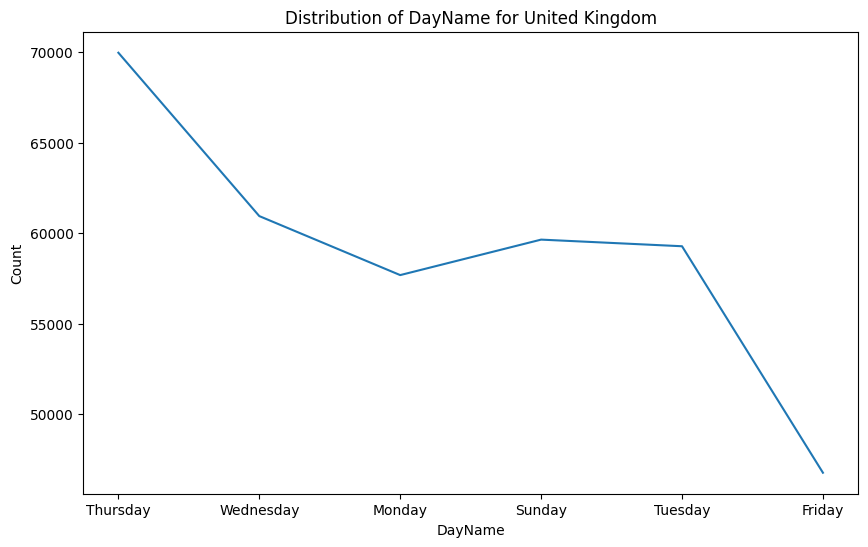

In [132]:
dayname_counts = df.groupBy('Country', 'DayName').count()
dayname_counts_pd = dayname_counts.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

#  'United Kingdom'
country_data = dayname_counts_pd[dayname_counts_pd['Country'] == 'United Kingdom']
# Plot the line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayName', y='count', data=country_data)
plt.xlabel('DayName')
plt.ylabel('Count')
plt.title('Distribution of DayName for United Kingdom')
plt.show()

In [ ]:
# # #drop MonetaryValue column
# df = df.drop('MonetaryValue')
# df=df.drop('MonetaryValues')
# # df.show()

In [ ]:
df.show()

+----------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+---------+-------+---------+--------------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|  DayName|Recency|Frequency|MonetaryValues|
+----------+---------+---------+--------------------+--------+----------------+---------+--------------+-------------------+----------+----------+---+-----+----+---------+-------+---------+--------------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/01/2010 08:26|     2.55|United Kingdom|2010-12-01 08:26:00|2010-12-01|      15.3|  1|   12|2010|Wednesday|    373|      297|       5391.21|
|     17850|   536365|    71053| WHITE METAL LANTERN|       6|12/01/2010 08:26|     3.39|United Kingdom|2010-12-01 08:26:00|2010-12-01|     20.34|  1|   12|2010|Wednesday|    373| 

In [133]:
#give customer id where recency is null show only customerid
df_rfm.filter(df_rfm.Recency.isNull()).select('CustomerID').show()
#give count how many null values are there in recency
df_rfm.filter(df_rfm.Recency.isNull()).count()

+----------+
|CustomerID|
+----------+
+----------+



0

In [134]:
#create RFM table with column MonetaryValue,Frequency and Recency
df_rfm = df.select('CustomerID', 'Recency', 'Frequency','MonetaryValues','Date')
df_rfm.show()

+----------+-------+---------+--------------+----------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|
+----------+-------+---------+--------------+----------+
|     12346|    325|        1|       77183.6|2011-01-18|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|      2|      182|        4310.0|2011-12-07|
|     12347|     39|      182|        4310.0|2011-10-31|
|     12347|     39|      182|        4310.0|2011-10-31|
|     12347|     39|      182| 

In [135]:
#for particular customerid =12346 give all data
df.filter(df_rfm.CustomerID == 12346).show()


+----------+---------+---------+--------+---------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+
|CustomerID|InvoiceNo|StockCode|Quantity|    InvoiceDate|UnitPrice|       Country|          Timestamp|      Date|TotalPrice|Day|Month|Year|DayName|Recency|Frequency|MonetaryValues|
+----------+---------+---------+--------+---------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+
|     12346|   541431|    23166|   74215|1/18/2011 10:01|     1.04|United Kingdom|2011-01-18 10:01:00|2011-01-18|   77183.6| 18|    1|2011|Tuesday|    325|        1|       77183.6|
+----------+---------+---------+--------+---------------+---------+--------------+-------------------+----------+----------+---+-----+----+-------+-------+---------+--------------+



In [136]:
#RFM Quartiles
# Calculate quartiles on df_rfm table for recency,frequency and monetaryvalues
rfm_quantiles = df_rfm.selectExpr("percentile_approx(Recency, array(0.25, 0.5,0.75)) as recency_quantiles",
                                   "percentile_approx(Frequency, array(0.25, 0.5,0.75)) as frequency_quantiles",
                                   "percentile_approx(MonetaryValues, array(0.25, 0.5,0.75)) as monetary_quantiles")
rfm_quantiles.show()


+-----------------+-------------------+--------------------+
|recency_quantiles|frequency_quantiles|  monetary_quantiles|
+-----------------+-------------------+--------------------+
|   [50, 131, 246]|     [90, 201, 447]|[1101.97, 2651.46...|
+-----------------+-------------------+--------------------+



In [137]:
#convert quartile to dict
rfm_quantiles_dict = rfm_quantiles.first().asDict()
rfm_quantiles_dict

{'recency_quantiles': [50, 131, 246],
 'frequency_quantiles': [90, 201, 447],
 'monetary_quantiles': [1101.97, 2651.46, 6287.77]}

In [139]:
#Creation of RFM Segment
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Assuming 'quantiles' is a broadcast variable containing the quartiles dictionary
quantiles_broadcast = spark.sparkContext.broadcast(rfm_quantiles_dict)

def RScore(x, p):
    quantiles = quantiles_broadcast.value
    if x <= quantiles[p.lower()+'_quantiles'][0]:
        return 4
    elif x <= quantiles[p.lower()+'_quantiles'][1]:
        return 3
    elif x <= quantiles[p.lower()+'_quantiles'][2]:
        return 2
    else:
        return 1

RScore_udf = udf(RScore, IntegerType())

# Example usage:
# Assuming 'rfm_df' is a PySpark DataFrame with a 'recency_quantiles' column
from pyspark.sql.functions import lit

#quantiles_broadcast = spark.sparkContext.broadcast(your_quartiles_dict)


def FMScore(x, p):
    quantiles = quantiles_broadcast.value
    if x <= quantiles[p.lower()+'_quantiles'][0]:
        return 1
    elif x <= quantiles[p.lower()+'_quantiles'][1]:
        return 2
    elif x <= quantiles[p.lower()+'_quantiles'][2]:
        return 3
    else:
        return 4


# Register the UDF
FMScore_udf = udf(FMScore, IntegerType())


In [140]:
df_with_scores = df_rfm.withColumn('F_Quartile', FMScore_udf(df_rfm['Frequency'], lit('Frequency')))
df_with_scores = df_with_scores.withColumn('M_Quartile', FMScore_udf(df_with_scores['MonetaryValues'], lit('Monetary')))

df_with_scores = df_with_scores.withColumn('R_Quartile', RScore_udf(df_with_scores['Recency'], lit('Recency')))
df_with_scores.show()


+----------+-------+---------+--------------+----------+----------+----------+----------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|F_Quartile|M_Quartile|R_Quartile|
+----------+-------+---------+--------------+----------+----------+----------+----------+
|     12346|    325|        1|       77183.6|2011-01-18|         1|         4|         1|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|
|     1234

In [141]:
#create RFM score table
from pyspark.sql.functions import concat
df_with_scores = df_with_scores.withColumn('RFM_Score', concat(col('R_Quartile'), col('F_Quartile'), col('M_Quartile')))
df_with_scores.show()


+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|F_Quartile|M_Quartile|R_Quartile|RFM_Score|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|     12346|    325|        1|       77183.6|2011-01-18|         1|         4|         1|      114|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|
|     12347|      2|      182|        4310.0|2011-12-07|         2|         3|         4|      423|


In [142]:
#find best customer on basis of rfm score
df_with_scores.filter(df_with_scores.RFM_Score == '414').show()

+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|F_Quartile|M_Quartile|R_Quartile|RFM_Score|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|


In [143]:
#find best rfm score
df_with_scores.groupBy('RFM_Score').count().orderBy('count', ascending=False).show()

+---------+-----+
|RFM_Score|count|
+---------+-----+
|      411|18382|
|      244|17966|
|      311|17684|
|      111|17478|
|      444|17111|
|      344|16676|
|      144|16374|
|      211|15935|
|      133|11589|
|      333|10908|
|      233|10517|
|      322|10432|
|      222|10275|
|      421|10124|
|      122| 9696|
|      432| 9038|
|      422| 8916|
|      223| 8647|
|      433| 8525|
|      443| 7888|
+---------+-----+
only showing top 20 rows



In [149]:
#top 5 customer having rfm score=414
top_five=df_with_scores.filter(df_with_scores.RFM_Score == '414').orderBy('MonetaryValues', ascending=False).distinct().show(5)


+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|F_Quartile|M_Quartile|R_Quartile|RFM_Score|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|     14607|     36|       86|       16569.5|2011-11-03|         1|         4|         4|      414|
|     13225|      3|       32|       6463.84|2011-12-06|         1|         4|         4|      414|
|     12931|     30|       82|      42055.96|2011-11-09|         1|         4|         4|      414|
|     17857|     30|       54|      26879.04|2011-11-09|         1|         4|         4|      414|
|     12557|     16|       33|      11990.96|2011-11-23|         1|         4|         4|      414|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
only showing top 5 rows



In [150]:
#find best customer based on rfm score with distinct customer id
df_with_scores.filter(df_with_scores.RFM_Score == '414').select('CustomerID','RFM_Score').distinct().show(5)

+----------+---------+
|CustomerID|RFM_Score|
+----------+---------+
|     17949|      414|
|     16656|      414|
|     12830|      414|
|     16446|      414|
|     12931|      414|
+----------+---------+
only showing top 5 rows



In [154]:
#find 5 top customer on basis of rfm score
df_with_scores.filter(df_with_scores.RFM_Score == '444').orderBy('MonetaryValues').distinct().show(5)


+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|CustomerID|Recency|Frequency|MonetaryValues|      Date|F_Quartile|M_Quartile|R_Quartile|RFM_Score|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
|     15311|      0|     2379|       60767.9|2011-12-09|         4|         4|         4|      444|
|     12748|     47|     4596|      33719.73|2011-10-23|         4|         4|         4|      444|
|     14911|      9|     5677|     143825.06|2011-11-30|         4|         4|         4|      444|
|     14646|     23|     2080|     280206.02|2011-11-16|         4|         4|         4|      444|
|     14646|     29|     2080|     280206.02|2011-11-10|         4|         4|         4|      444|
+----------+-------+---------+--------------+----------+----------+----------+----------+---------+
only showing top 5 rows



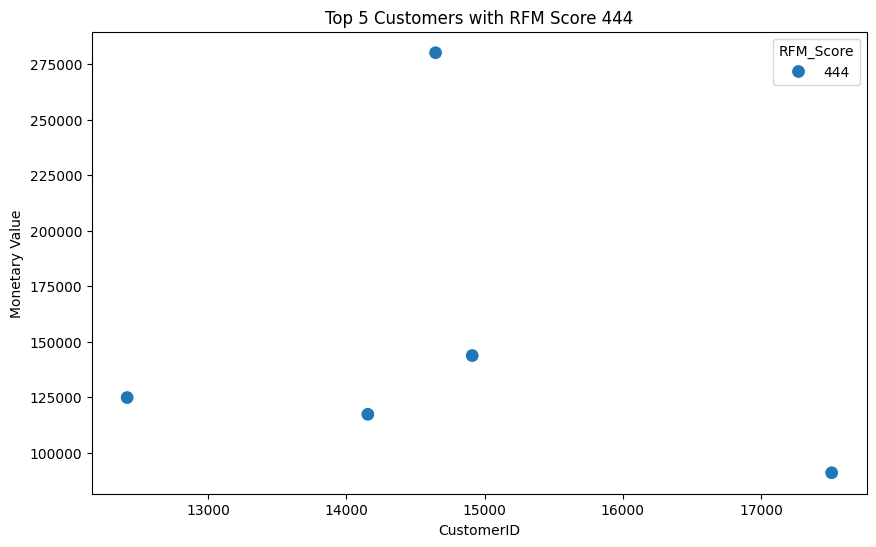

In [156]:
#find 5 top customer on basis of rfm score and plot scatter plot with unique customerid
top_5_customers = df_with_scores.filter(df_with_scores.RFM_Score == '444') \
    .select('CustomerID', 'RFM_Score', 'MonetaryValues') \
    .distinct() \
    .orderBy('MonetaryValues', ascending=False) \
    .limit(5) \
    .toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_5_customers, x='CustomerID', y='MonetaryValues', hue='RFM_Score', s=100)
plt.title('Top 5 Customers with RFM Score 444')
plt.xlabel('CustomerID')
plt.ylabel('Monetary Value')
plt.show()


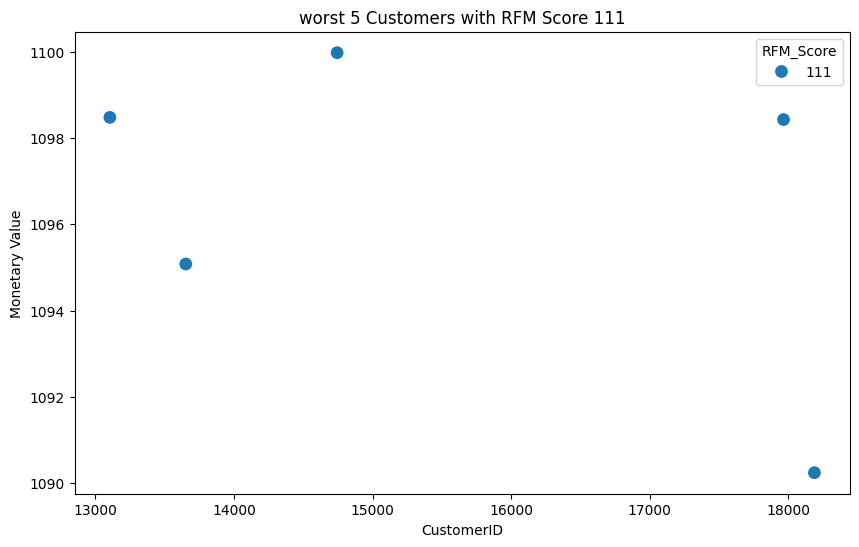

In [159]:
# worst 5 customers having rfm score =111 plot
# Select distinct customers with RFM score 444, order by MonetaryValues, and take the top 5
worst_5_customers = df_with_scores.filter(df_with_scores.RFM_Score == '111') \
    .select('CustomerID', 'RFM_Score', 'MonetaryValues') \
    .distinct() \
    .orderBy('MonetaryValues', ascending=False) \
    .limit(5) \
    .toPandas()

# Plot the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_5_customers, x='CustomerID', y='MonetaryValues', hue='RFM_Score', s=100)
plt.title('worst 5 Customers with RFM Score 111')
plt.xlabel('CustomerID')
plt.ylabel('Monetary Value')
plt.show()

In [160]:
# Assuming 'rfm_segmentation' is a PySpark DataFrame

# Best Customers
best_customers_count = df_with_scores.filter(df_with_scores['RFM_Score'] == '414').count()
print("Best Customers: ", best_customers_count)

# # Loyal Customers
loyal_customers_count = df_with_scores.filter(df_with_scores['F_Quartile'] == 4).count()
print('Loyal Customers: ', loyal_customers_count)

# Big Spenders
big_spenders_count =df_with_scores.filter(df_with_scores['M_Quartile'] == 4).count()
print("Big Spenders: ", big_spenders_count)

# Almost Lost
almost_lost_count = df_with_scores.filter(df_with_scores['RFM_Score'] == '214').count()
print('Almost Lost: ', almost_lost_count)

# Lost Customers
lost_customers_count = df_with_scores.filter(df_with_scores['RFM_Score'] == '111').count()
print('Lost Customers: ', lost_customers_count)



Best Customers:  272
Loyal Customers:  99216
Big Spenders:  99397
Almost Lost:  399
Lost Customers:  17478
